## Building Neural Netweorks in PyTorch

In [115]:
from torch import nn, optim
from torch.nn.functional import sigmoid, softmax, relu
import helper
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from collections import OrderedDict

### Single Layer Network

In [43]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.input = nn.Linear(784,256)
    
        self.ouput = nn.Linear(256,10)
    
    def feedforward(self,x):
        x = sigmoid(self.input(x))
        x = softmax(self.ouput(x), dim=1)
        return x
    

### Multi Layer Network

<img src="assets/mlp_mnist.png" width=600px>

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

In [57]:
class MultiLayerNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(784, 128)
        self.hidden_layer_2 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, 10)
        
    def forward(self, x):
        x = relu(self.hidden_layer_1(x))
        x = relu(self.hidden_layer_2(x))
        x = softmax(self.output_layer(x), dim=1)
        return x

In [58]:
model = MultiLayerNet()
model

MultiLayerNet(
  (hidden_layer_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases

Check the weights & bias automatically generated for us when we used `nn.Linear` 

In [59]:
model.hidden_layer_1.weight

Parameter containing:
tensor([[-0.0174, -0.0345, -0.0340,  ...,  0.0005, -0.0057, -0.0262],
        [ 0.0242,  0.0298,  0.0130,  ...,  0.0213, -0.0014,  0.0110],
        [ 0.0111, -0.0095, -0.0225,  ...,  0.0163, -0.0177,  0.0160],
        ...,
        [-0.0115,  0.0028, -0.0168,  ..., -0.0304, -0.0306, -0.0072],
        [ 0.0022,  0.0319,  0.0121,  ..., -0.0200,  0.0212,  0.0286],
        [ 0.0096,  0.0164,  0.0169,  ...,  0.0117,  0.0300, -0.0016]],
       requires_grad=True)

In [60]:
model.hidden_layer_1.bias

Parameter containing:
tensor([-0.0297, -0.0140,  0.0308, -0.0028, -0.0093, -0.0134,  0.0193,  0.0297,
        -0.0131, -0.0075,  0.0348, -0.0145,  0.0238,  0.0355,  0.0322,  0.0042,
        -0.0150, -0.0161,  0.0213,  0.0305, -0.0078, -0.0185, -0.0305, -0.0351,
         0.0327,  0.0323,  0.0274,  0.0011,  0.0228,  0.0038,  0.0166, -0.0273,
        -0.0274,  0.0058, -0.0146, -0.0160,  0.0049,  0.0001, -0.0176,  0.0136,
         0.0209,  0.0299,  0.0178, -0.0102,  0.0329, -0.0320, -0.0193,  0.0116,
        -0.0112,  0.0053,  0.0281,  0.0020, -0.0276,  0.0187, -0.0021, -0.0005,
         0.0304,  0.0241, -0.0328,  0.0061,  0.0047, -0.0062,  0.0269,  0.0057,
         0.0287,  0.0215, -0.0211,  0.0300,  0.0276,  0.0293,  0.0180,  0.0208,
        -0.0337,  0.0327,  0.0229,  0.0194,  0.0325, -0.0305, -0.0005,  0.0185,
         0.0003,  0.0168, -0.0305,  0.0241, -0.0238,  0.0076,  0.0338,  0.0069,
         0.0115, -0.0192, -0.0320,  0.0137,  0.0214,  0.0231,  0.0278, -0.0112,
         0.0058,  

### Custom Initialization of Weights and Bias

When we check the auto generated weights and bias using `model.hidden_layer_1.weight` & `model.hidden_layer_1.bias` we only get to see the _Autogard_ values. To modify these weights we need to get the real tensors representing the weights and bias using `model.hidden_layer_1.weight.data` & `model.hidden_layer_1.bias.data` as below

In [62]:
# Initialize the Weights normal random values with a standard deviation on 0.01
model.hidden_layer_1.weight.data.normal_(std=0.01)

tensor([[-0.0098,  0.0107, -0.0001,  ..., -0.0127, -0.0147, -0.0002],
        [-0.0080,  0.0038,  0.0020,  ...,  0.0005,  0.0129, -0.0142],
        [-0.0030, -0.0113,  0.0028,  ...,  0.0074,  0.0068,  0.0046],
        ...,
        [ 0.0113,  0.0040, -0.0173,  ..., -0.0006, -0.0061,  0.0128],
        [ 0.0099, -0.0149,  0.0020,  ...,  0.0071,  0.0042, -0.0070],
        [ 0.0077, -0.0088, -0.0131,  ...,  0.0059,  0.0079,  0.0091]])

In [63]:
model.hidden_layer_1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

### Forward pass

Pass an image to see how good the model is

In [70]:
# Download images

# Images location
data_location = '/Users/philsamoei/projects/ML/udacity/scholarshipchallenge/deep-learning-v2-pytorch/data'
data_location+'/MNIST_data'

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST(data_location+'/MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [71]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


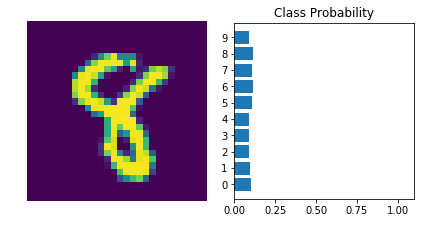

In [74]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

# images.resize_(64,1,784)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
# images.resize_(64, 1, 784)
images.resize_(images.shape[0], 1, 784)

img_idx = 0

ps = model.forward(images[img_idx,:])

img = images[img_idx]

helper.view_classify(img.view(1,28, 28), ps)

Because our model is not trained it does not understand the images its being shown

### Training our Model

For training we will use `nn.Sequential` to make it easier to build a network that we can pass the params sequentially.

In [122]:
input_layer = 784
hidden_layers = [128, 64]
output = 10
model = nn.Sequential(OrderedDict([
    ("hidden_layer1", nn.Linear(input_layer, hidden_layers[0])),
    ("relu1", nn.ReLU()),
    ("hidden_layer2", nn.Linear(hidden_layers[0], hidden_layers[1])),
    ("relu2", nn.ReLU()),
    ("output", nn.Linear(hidden_layers[1], output)),
    ("softmax", nn.LogSoftmax(dim=1))
]))


# Define the loss
criterion = nn.NLLLoss()

# Grab some data for testing
images, label = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass to get our logits/scores
log_probabilities = model(images)

# Calculate the loss
loss = criterion(log_probabilities, labels)

In [123]:
model

Sequential(
  (hidden_layer1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (hidden_layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): LogSoftmax()
)

In [88]:
model.hidden_layer1

Linear(in_features=784, out_features=128, bias=True)

In [90]:
loss

tensor(2.3297, grad_fn=<NllLossBackward>)

## Autograd

Automatically calculates the gradients of tensors. It works by keeping track on operations performed on the tensors then it can go back while calculating the gradients, hence _Backpropagation_

In [92]:
x = torch.zeros(1, requires_grad=True)
with torch.no_grad():
    y = x*2

In [93]:
y.requires_grad

False

In [94]:
y

tensor([0.])

In [95]:
x

tensor([0.], requires_grad=True)

In [96]:
x = torch.randn(2, 2, requires_grad=True)

In [97]:
x

tensor([[ 2.5440,  1.0209],
        [-0.0572,  1.0329]], requires_grad=True)

In [98]:
y = x * 2

In [99]:
y

tensor([[ 5.0881,  2.0419],
        [-0.1145,  2.0658]], grad_fn=<MulBackward>)

In [100]:
y.grad_fn

In [101]:
z = y.mean()
z

tensor(2.2703, grad_fn=<MeanBackward1>)

In [102]:
# Check if we have any gradient so far for x
x.grad

In [103]:
# Check if we have any gradient so far for y
y.grad

In [105]:
# Check if we have any gradient so far for z
z.grad

In [106]:
# To calculate the gradients run backwards on variable z
z.backward()

In [107]:
# Check if we have any gradient so far for x
x.grad

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [110]:
# Check if we have any gradient so far for y
y.grad

In [111]:
print("Before backward pass: \n", model.hidden_layer1.weight.grad)

Before backward pass: 
 None


In [113]:
loss.backward()

In [114]:
print("After backward pass: \n", model.hidden_layer1.weight.grad)

After backward pass: 
 tensor([[-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0044, -0.0044, -0.0044,  ..., -0.0044, -0.0044, -0.0044],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])


### Optimization

Optimaztion is updating the weights with the gradients

The general process of training a network in pytorch is

* Do a forward pass on the model
* Calculate the loss from the forward pass
* Calculate the gradients by performing a backward pass on the loss
* Use the optimizer to update the weights using the calculated gradients

In [128]:
print("Initial Weights: \n", model.hidden_layer1.weight)
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
# optimizers requires the paramters to update and the learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
# Clear the gradients becuase for every backward pass its accumulated
optimizer.zero_grad()

# Forward pass
log_probs = model(images)
#calculate loss
loss = criterion(log_probs, labels)
#backward pass
loss.backward()
print("Gradients: \n", model.hidden_layer1.weight.grad)
#update weights
optimizer.step()
print("Updated Weights: \n", model.hidden_layer1.weight)

Initial Weights: 
 Parameter containing:
tensor([[ 0.0330, -0.0051,  0.0234,  ...,  0.0317, -0.0270, -0.0156],
        [ 0.0218,  0.0194, -0.0035,  ...,  0.0339,  0.0141, -0.0317],
        [ 0.0230,  0.0000,  0.0037,  ...,  0.0035, -0.0303,  0.0281],
        ...,
        [ 0.0071,  0.0138, -0.0155,  ...,  0.0193,  0.0124,  0.0240],
        [ 0.0262,  0.0158, -0.0113,  ..., -0.0257, -0.0249,  0.0147],
        [-0.0061, -0.0006, -0.0127,  ...,  0.0345, -0.0206,  0.0248]],
       requires_grad=True)
Gradients: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])
Updated Weights: 
 Parameter containing:
tensor([[ 

### Fully Implemented neural network capable of predicting handwritten digits

In [137]:
# Create the model
model = nn.Sequential(OrderedDict([
    ("layer1", nn.Linear(input_layer, hidden_layers[0])),
    ("relu1", nn.ReLU()),
    ("layer2", nn.Linear(hidden_layers[0], hidden_layers[1])),
    ("relu2", nn.ReLU()),
    ("output_layer", nn.Linear(hidden_layers[1], output)),
    ("softmax", nn.LogSoftmax(dim=1))
]))

# Define the cost function AKA loss function
criterion = nn.NLLLoss()

# Define the optimization strategy used to update the weights
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Define the number of epochs
epochs = 15

# Train the model for the number of epochs
for e in range(epochs):
    current_loss = 0
    for images, labels in trainloader:
        # Flatten images
        images = images.view(images.shape[0], -1)
        
        # reset the optimizer
        optimizer.zero_grad()
        
        # Do a forward pass
        log_probabilities = model(images)
        
        # Calculate loss
        loss = criterion(log_probabilities, labels)
        
        # Generate the gradients
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Combine the loss for the bacth
        current_loss += loss.item()
        
    else:
        print(f"Training loss: {current_loss/len(trainloader)}")
        

Training loss: 1.9292910637886032
Training loss: 0.8607724097047025
Training loss: 0.5315849918451137
Training loss: 0.43674332333970933
Training loss: 0.3917511620882478
Training loss: 0.3648292372888848
Training loss: 0.3458736185183022
Training loss: 0.331572781509555
Training loss: 0.3199742227586221
Training loss: 0.30960311987665673
Training loss: 0.300659416175918
Training loss: 0.29250535643748893
Training loss: 0.28458353981121515
Training loss: 0.2772412703140204
Training loss: 0.2703358804239139


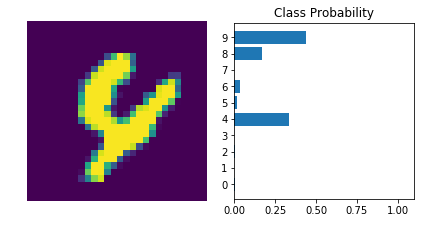

In [177]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)